### SSMI watervapor

In [1]:
__author__ = 'Yingkai (Kyle) Sha'
__email__  = 'yingkai@eos.ubc.ca' 

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from e582utils.data_read import download
from e582lib.SSMI import coef, emiss
% matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
temp_file='bright_temps.h5'
download(temp_file)

trying https://clouds.eos.ubc.ca/~phil/courses/atsc301/downloads/bright_temps.h5
writing to: bright_temps.h5

bright_temps.h5 already exists
and is 4159584 bytes
will not overwrite



### Function for histogram. 

In [5]:
def hist_SSMI(CWV_unfixed, CWV_both, CWV_19, CWL_unfixed, CWL_both, CWL_19):
    
    CWV_unfixed = CWV_unfixed.flatten(); CWV_both = CWV_both.flatten(); CWV_19 = CWV_19.flatten()
    CWL_unfixed = CWL_unfixed.flatten(); CWL_both = CWL_both.flatten(); CWL_19 = CWL_19.flatten()
    binCWV = np.arange(0, 70+1, 1); binCWL = np.arange(0, 0.7+0.01, 0.01)
    
    fig = plt.figure(figsize=(16, 4))
    ax1=plt.subplot2grid((1, 2), (0, 0), colspan=1, rowspan=1)
    ax2=plt.subplot2grid((1, 2), (0, 1), colspan=1, rowspan=1)

    ax1.hist(CWV_unfixed[~np.isnan(CWV_unfixed)], binCWV, color='y', linewidth=2.5, histtype='step', label='unfixed');
    ax1.hist(CWV_both[~np.isnan(CWV_both)],       binCWV, color='b', linewidth=2.5, histtype='step', label='fixed: both 19, 37 GHz');
    ax1.hist(CWV_19[~np.isnan(CWV_19)],           binCWV, color='r', linewidth=2.5, histtype='step', label='fixed: 19 GHz only');
    ax1.legend(); ax1.grid(); ax1.set_xlabel('CWV', fontsize=12)
    ax1.set_title('(a) unfixed v.s. fixed CWV Histogram', fontsize=12, fontweight='bold')

    ax2.hist(CWL_unfixed[~np.isnan(CWL_unfixed)], binCWL, color='y', linewidth=2.5, histtype='step', label='unfixed');
    ax2.hist(CWL_both[~np.isnan(CWL_both)],       binCWL, color='b', linewidth=2.5, histtype='step', label='fixed: both 19, 37 GHz');
    ax2.hist(CWL_19[~np.isnan(CWL_19)],           binCWL, color='r', linewidth=2.5, histtype='step', label='fixed: 19 GHz only');
    ax2.legend(); ax2.grid(); ax2.set_xlabel('CWL', fontsize=12)
    ax2.set_title('(b) unfixed v.s. fixed CWL Histogram', fontsize=12, fontweight='bold')

### Function for maps

In [6]:
def single_map(lon,lat,data):
    proj = Basemap(projection='moll', lon_0=180, resolution='c', ax=ax)
    proj.drawcoastlines()
    proj.drawmeridians(np.arange(0, 360, 60));
    proj.drawparallels(np.arange(-90, 90, 30));
    return proj
    
def SSMI_map(lon, lat, CWV_unfixed, CWV_both, CWV_19, CWL_unfixed, CWL_both, CWL_19,the_date='Jan 1990'):
    
    levCWV = np.arange(0, 80+5, 5); levCWL = np.arange(0, 0.7+0.07, 0.07)

    fig = plt.figure(figsize=(12, 8))
    ax1=plt.subplot2grid((3, 2), (0, 0), colspan=1, rowspan=1); ax2=plt.subplot2grid((3, 2), (1, 0), colspan=1, rowspan=1)
    ax3=plt.subplot2grid((3, 2), (2, 0), colspan=1, rowspan=1); ax4=plt.subplot2grid((3, 2), (0, 1), colspan=1, rowspan=1)
    ax5=plt.subplot2grid((3, 2), (1, 1), colspan=1, rowspan=1); ax6=plt.subplot2grid((3, 2), (2, 1), colspan=1, rowspan=1)

    proj=single_map(ax1); x, y = proj(lon, lat)
    CS = proj.contourf(x, y, CWV_unfixed, levCWV, cmap=plt.cm.RdYlGn, extend='max')
    ax1.set_title('(a.1) CWV unfixed {}'.format(the_date), fontsize=12, fontweight='bold', y = 1.025)

    proj=single_map(ax2); x, y = proj(lon, lat)
    CS = proj.contourf(x, y, CWV_both, levCWV, cmap=plt.cm.RdYlGn, extend='max')
    ax2.set_title('(a.2) CWV fixed: both {}'.format(the_date), fontsize=12, fontweight='bold', y = 1.025)
    
    proj=single_map(ax3); x, y = proj(lon, lat)
    CS = proj.contourf(x, y, CWV_19, levCWV, cmap=plt.cm.RdYlGn, extend='max')
    ax3.set_title('(a.3) CWV fixed: 19 GHz only {}'.format(the_date), fontsize=12, fontweight='bold', y = 1.025)   
    
    cax  = fig.add_axes([0.175, 0.05, 0.25, 0.02])
    CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
    CBar.ax.tick_params(axis='x', length=12.5)
    CBar.set_label('CWV $\mathrm{kg/m^2}$', fontsize=12)

    proj=single_map(ax4); x, y = proj(lon, lat)
    CS = proj.contourf(x, y, CWL_unfixed, levCWL, cmap=plt.cm.gist_ncar_r, extend='max')
    ax4.set_title('(b.1) CWL unfixed {}'.format(the_date), fontsize=12, fontweight='bold', y = 1.025)
    
    proj=single_map(ax5); x, y = proj(lon, lat)
    CS = proj.contourf(x, y, CWL_both, levCWL, cmap=plt.cm.gist_ncar_r, extend='max')
    ax5.set_title('(b.2) CWL fixed: both {}'.format(the_date), fontsize=12, fontweight='bold', y = 1.025)
    
    proj=single_map(ax6); x, y = proj(lon, lat)
    CS = proj.contourf(x, y, CWL_19, levCWL, cmap=plt.cm.gist_ncar_r, extend='max')
    ax6.set_title('(b.3) CWL fixed: 19 GHz only {}'.format(the_date), fontsize=12, fontweight='bold', y = 1.025)
    
    cax  = fig.add_axes([0.6, 0.05, 0.25, 0.02])
    CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
    CBar.ax.tick_params(axis='x', length=12.5)
    CBar.set_label('CWL', fontsize=12)

## Retrieval functions

SSMI.py including functions calculates emissivity and absorption coefficient at at 19 and 37 GHz SSMI channel.

Code is Python version of <a href='http://www.aos.wisc.edu/~tristan/aos740.php'>**UW-Madison AOS-704**</a> 's FORTRAN77 code.

Approximation of windspeed and main retrieval function in Greenwald et al., 1993.

In [7]:
# windspeed
def wind_speed(sst, t19v, t22v, t37h, t37v):
    """
       input: sst (K), t19v (K), t22v (K), t37h (K)
       output: windspeed (m/s)
    """
    speed=1.0969*(t19v)-0.4555e0*(t22v)- 1.76*(t37v)+0.786*(t37h)+ 147.9
    return speed

# retrival, based on EOSC 582 Website
def SSMI_retrieval(SST, theta, T19H, T19V, T22V, T37H, T37V, iter_num=5, correction='both'):
    '''
    Using 4 SSMI channel brightness temperature retrive total precipitable water and liquid water path
    =========================================================================
    CMV, CWL = SSMI_retrieval(SST, theta, T19H, T19V, T22V, T37H, T37V, iter_num=5)
    -------------------------------------------------------------------------
    Input:
        SST: Sea Surface Temperature (K)
        theta: Incidence angle
        T#H: Brightness temperature in #GHz band with horizontal polarization
        T#V: Brightness temperature in #GHz band with vertical polarization
        iter_num: = 0 means no correction, > 0 applies correction to CWV > 25kg/m^2
    Output:
        CWV: Total precipitable water
        CWL: Liquid water path
    ==========================================================================
    Author:
        Yingkai (Kyle) Sha
        yingkai@eos.ubc.ca
    '''
    M, N = np.shape(SST)
    # Parameters
    mu = np.cos(theta*np.pi/180.) # Incidence angle
    GAMMA = -5.8E-3               # Lapse rate: -5.8 K/km = -5.8E-3 K/m
    Hw = 2.2E3                    # Water vapor scaling height: 2.2km
    # Correction for cold bias
    #    (Greenwald et al., 1993)
    T37H= T37H + 3.58  
    T37V= T37V + 3.58
    # delta T
    dT19 = T19H - T19V
    dT37 = T37H - T37V
    # Frequency bands (GHz)
    freq = [19, 22, 37, 85]
    # Allocate memorise
    emissv = np.empty([len(freq), M, N])
    emissh = np.empty([len(freq), M, N])
    KL19  = np.empty([M, N])
    KL37  = np.empty([M, N])
    KV19  = np.empty([M, N])
    KV37  = np.empty([M, N])
    TOX19 = np.empty([M, N])
    TOX37 = np.empty([M, N])
    # Emperical windspeed
    windspeed = wind_speed(SST, T19V, T22V, T37H-3.58, T37V-3.58)
    # Calculate emission, absorbtion coef. 
    for m in range(M):
        for n in range(N):
            for i in range(len(freq)):
                emissv[i, m, n], emissh[i, m, n] = emiss(i+1, windspeed[m, n], SST[m, n], theta)
            KL19[m, n], KL37[m, n], KV19[m, n], KV37[m, n], TOX19[m, n], TOX37[m, n] = coef(SST[m, n])
    # Retrieve function
    R37V=(1.0 - emissv[2, :, :])
    R19V=(1.0 - emissv[0, :, :])
    R37H=(1.0 - emissh[2, :, :])
    R19H=(1.0 - emissh[0, :, :])
    # Iteration correction of F19, F37 for CWV > 25kg/m^2
    #    Greenwald et al., 1993) equation (4)
    CWV = np.zeros(SST.shape)
    #CWL = np.zeros(SST.shape)
    T019 = SST
    T037 = SST
    for iteration in range(iter_num):
        hit = CWV > 25
        # transmission
        Tau19V = np.exp(-1*KV19*CWV/mu)
        Tau37V = np.exp(-1*KV37*CWV/mu)
        f19 = np.exp(50*KV19/mu)
        f37 = np.exp(50*KV37/mu)
        if iteration > 0:
            # in the first timestep, T019, T037 = SST
            T019[hit] = SST[hit] + GAMMA*Hw*(1-f19[hit]*Tau19V[hit]**2)*TOX19[hit]
            if correction == 'both':
                T037[hit] = SST[hit] + GAMMA*Hw*(1-f37[hit]*Tau37V[hit]**2)*TOX37[hit]
        #T037[hit] = SST[hit]
        # Correction 
        F19 = (T19H - T019)/(T19V - T019)
        F37 = (T37H - T037)/(T37V - T037)
        R1  = -1*mu/2.*np.log(dT19/(SST*R19V*(1-F19)*TOX19**2.))
        R2  = -1*mu/2.*np.log(dT37/(SST*R37V*(1-F37)*TOX37**2.))
        # Linear algebra
        M   = KV19*KL37 - KL19*KV37
        CWV = (R1*KL37 - R2*KL19)/M
        #print('iteration step = {}'.format(iteration))
    # get CWL
    CWL = (R2*KV19 - R1*KV37)/M
    
    return CWV, CWL

In [8]:
theta = 53.1
# boardcasting because my retrival function supports 2D array
SST   = 271.75*np.ones([1, 1]) 
T19H  = 113.57*np.ones([1, 1])
T19V  = 183.24*np.ones([1, 1])
T22V  = 194.80*np.ones([1, 1])
T37H  = 148.13*np.ones([1, 1])
T37V  = 208.11*np.ones([1, 1])

SSMI_retrieval(SST, theta, T19H, T19V, T22V, T37H, T37V, iter_num=4, correction='both')

(array([[ 8.55725684]]), array([[ 0.05486357]]))

### Full Retrival

#### Jan

In [9]:
with h5py.File(temp_file, 'r') as TB_obj:
    lat = TB_obj['lat'][:]
    lon = TB_obj['lon'][:]
    SST = TB_obj['jan/sst'][:]
    T19H = TB_obj['jan/t19h'][:]
    T19V = TB_obj['jan/t19v'][:]
    T22V = TB_obj['jan/t22v'][:]
    T37H = TB_obj['jan/t37h'][:]
    T37V = TB_obj['jan/t37v'][:]

In [10]:
theta = 53.1
CWV1_unfixed, CWL1_unfixed = SSMI_retrieval(SST, theta, T19H, T19V, T22V, T37H, T37V, iter_num=1)
CWV1_both,    CWL1_both    = SSMI_retrieval(SST, theta, T19H, T19V, T22V, T37H, T37V, iter_num=5, correction='both')
CWV1_19,      CWL1_19      = SSMI_retrieval(SST, theta, T19H, T19V, T22V, T37H, T37V, iter_num=5, correction='19')

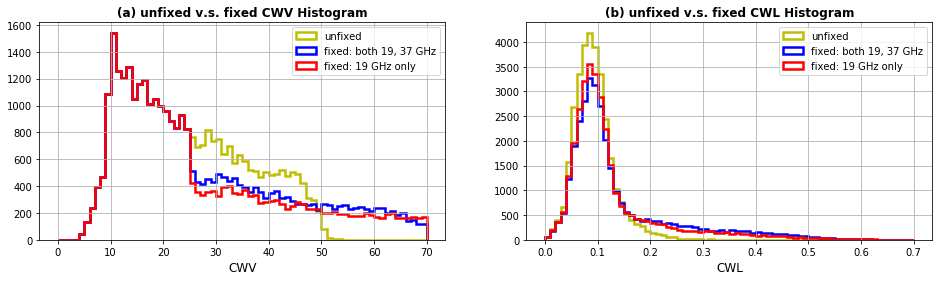

In [11]:
hist_SSMI(CWV1_unfixed, CWV1_both, CWV1_19, CWL1_unfixed, CWL1_both, CWL1_19)

TypeError: single_map() missing 2 required positional arguments: 'lat' and 'data'

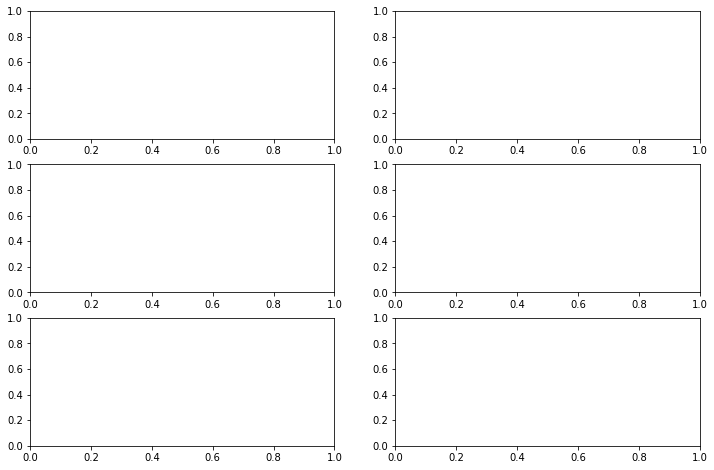

In [12]:
SSMI_map(lon, lat, CWV1_unfixed, CWV1_both, CWV1_19, CWL1_unfixed, CWL1_both, CWL1_19,the_date='(Jan 1990)')

#### Jul

In [ ]:
with h5py.File(temp_file, 'r') as TB_obj:
    SST = TB_obj['july/sst'][:]
    T19H = TB_obj['july/t19h'][:]
    T19V = TB_obj['july/t19v'][:]
    T22V = TB_obj['july/t22v'][:]
    T37H = TB_obj['july/t37h'][:]
    T37V = TB_obj['july/t37v'][:]

In [ ]:
CWV7_unfixed, CWL7_unfixed = SSMI_retrieval(SST, theta, T19H, T19V, T22V, T37H, T37V, iter_num=1)
CWV7_both,    CWL7_both    = SSMI_retrieval(SST, theta, T19H, T19V, T22V, T37H, T37V, iter_num=5, correction='both')
CWV7_19,      CWL7_19      = SSMI_retrieval(SST, theta, T19H, T19V, T22V, T37H, T37V, iter_num=5, correction='19')

In [ ]:
hist_SSMI(CWV7_unfixed, CWV7_both, CWV7_19, CWL7_unfixed, CWL7_both, CWL7_19)

In [ ]:
SSMI_map(lon, lat, CWV7_unfixed, CWV7_both, CWV7_19, CWL7_unfixed, CWL7_both, CWL7_19,the_date='(July 1990)')

## Zonal mean results

In [ ]:
CWV1z_19 = np.nanmean(CWV1_19, 1); CWL1z_19 = np.nanmean(CWL1_19, 1)
CWV7z_19 = np.nanmean(CWV7_19, 1); CWL7z_19 = np.nanmean(CWL7_19, 1)
CWV1z_both = np.nanmean(CWV1_both, 1); CWL1z_both = np.nanmean(CWL1_both, 1)
CWV7z_both = np.nanmean(CWV7_both, 1); CWL7z_both = np.nanmean(CWL7_both, 1)
CWV1z_unfixed = np.nanmean(CWV1_unfixed, 1); CWL1z_unfixed = np.nanmean(CWL1_unfixed, 1)
CWV7z_unfixed = np.nanmean(CWV7_unfixed, 1); CWL7z_unfixed = np.nanmean(CWL7_unfixed, 1)

fig = plt.figure(figsize=(14, 12))
ax1=plt.subplot2grid((2, 2), (0, 0), colspan=1, rowspan=1)
ax2=plt.subplot2grid((2, 2), (0, 1), colspan=1, rowspan=1)
ax3=plt.subplot2grid((2, 2), (1, 0), colspan=1, rowspan=1)
ax4=plt.subplot2grid((2, 2), (1, 1), colspan=1, rowspan=1)

ax1.plot(lat[:, 0], CWV1z_unfixed, color=[0, 0.2, 0.4], linewidth=3.5, label='Jan unfixed');
ax1.plot(lat[:, 0], CWV1z_both, color=[0, 0.5, 0.7], linewidth=3.5, label='Jan fixed: both');
ax1.plot(lat[:, 0], CWV1z_19, color=[0, 0.8, 1], linewidth=3.5, label='Jan fixed: 19 GHz only');
ax1.grid(); ax1.legend(loc=4); ax1.set_xlim(-90, 90);
ax1.set_title('(a) Zonal mean CWV | Jan', fontsize=12, fontweight='bold')

ax2.plot(lat[:, 0], CWV7z_unfixed, color=[0.4, 0.2, 0], linewidth=3.5, label='Jul unfixed');
ax2.plot(lat[:, 0], CWV7z_both, color=[0.7, 0.5, 0], linewidth=3.5, label='Jul fixed: both');
ax2.plot(lat[:, 0], CWV7z_19, color=[1, 0.8, 0], linewidth=3.5, label='Jul fixed: 19 GHz only');
ax2.grid(); ax2.legend(loc=4); ax2.set_xlim(-90, 90); 
ax2.set_title('(b) Zonal mean CWV | Jul', fontsize=12, fontweight='bold')

ax3.plot(lat[:, 0], CWL1z_unfixed, color=[0, 0.2, 0.4], linewidth=3.5, label='Jan unfixed');
ax3.plot(lat[:, 0], CWL1z_both, color=[0, 0.5, 0.7], linewidth=3.5, label='Jan fixed: both');
ax3.plot(lat[:, 0], CWL1z_19, color=[0, 0.8, 1], linewidth=3.5, label='Jan fixed: 19 GHz only');
ax3.grid(); ax3.legend(loc=4); ax3.set_xlim(-90, 90); 
ax3.set_title('(c) Zonal mean CWL | Jan', fontsize=12, fontweight='bold')

ax4.plot(lat[:, 0], CWL7z_unfixed, color=[0.4, 0.2, 0], linewidth=3.5, label='Jul unfixed');
ax4.plot(lat[:, 0], CWL7z_both, color=[0.7, 0.5, 0], linewidth=3.5, label='Jul fixed: both');
ax4.plot(lat[:, 0], CWL7z_19, color=[1, 0.8, 0], linewidth=3.5, label='Jul fixed: 19 GHz only');
ax4.grid(); ax4.legend(loc=4); ax4.set_xlim(-90, 90); 
ax4.set_title('(d) Zonal mean CWL | Jul', fontsize=12, fontweight='bold')